In [1]:
#Cargar librerias necesarias, pandas para dataframe, numpy para manejo de variables, matplotlib para gráficos, seaborn para análisis
#openpyxl para abrir el archivo de excel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [2]:
#Abrir archivo excel y mostrar los encabezados con los 5 primeros registros
df = pd.read_excel('/content/Atencion2025_limpia.xlsx', engine='openpyxl', dtype=str)
df.head()

,ID,Estado,Sexo,Prevision,Rango Edad,Estival Fecha Cita,Rango Hora Cita,Agenda Biomedica,Profesional,Tipo atencion,Distancia comuna,Tipo Cita
0,1,Atendido,Femenino,FONASA Tipo B,Adultos,Verano,Mañana,Otros,Medicina,Consultas Médicas,Cercana (hasta 40 km),Presencial
1,2,Atendido,Femenino,FONASA Tipo B,Adultos,Verano,Mañana,Otros,Medicina,Consultas Médicas,Cercana (hasta 40 km),Presencial
2,3,Atendido,Femenino,FONASA Tipo D,Adultos,Verano,Media Mañana,Otros,Medicina,Consultas Médicas,Intermedia (41-80 km),Presencial
3,4,Atendido,Femenino,FONASA Tipo B,Adultos,Verano,Mañana,Otros,Medicina,Consultas Médicas,Cercana (hasta 40 km),Presencial
4,5,Atendido,Femenino,FONASA Tipo B,Adultos,Verano,Media Mañana,Otros,Medicina,Consultas Médicas,Cercana (hasta 40 km),Presencial


In [3]:
#Mostrar todos los encabezados, numero de registros, valores nulos y tipo de variable.
#No existen valores nulos en ninguna columna, todas son categóricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717162 entries, 0 to 717161
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ID                  717162 non-null  object
 1   Estado              717162 non-null  object
 2   Sexo                717162 non-null  object
 3   Prevision           717162 non-null  object
 4   Rango Edad          717162 non-null  object
 5   Estival Fecha Cita  717162 non-null  object
 6   Rango Hora Cita     717162 non-null  object
 7   Agenda Biomedica    717162 non-null  object
 8   Profesional         717162 non-null  object
 9   Tipo atencion       717162 non-null  object
 10  Distancia comuna    717162 non-null  object
 11  Tipo Cita           717162 non-null  object
dtypes: object(12)
memory usage: 65.7+ MB


In [4]:
#Eliminar la columna ID, ya que no es necesaria y la reconoce como numérica, lo cual entorpece los análisis posteriores
df = df.drop('ID', axis=1)


In [5]:
#Mostrar todas las categorias que existen por variable, para observar si están homogenizadas (por ejemplo, escritas de la misma manera)
#Se observa que la variable Previsión tiene una categoria llamada "Sin información" que corresponde a un dato faltante
#Sólo la variable "Tipo de profesional" tiene una cardinalidad mayor a las demás, esto podría perjudicar el tiempo de procesamiento y la calidad del modelo
for column in df.select_dtypes(include='object').columns:
    print(f"Categorías por columna '{column}':")
    print(df[column].unique())
    print("\n")

Categorías por columna 'Estado':
['Atendido' 'No se presentó']


Categorías por columna 'Sexo':
['Femenino' 'Masculino']


Categorías por columna 'Prevision':
['FONASA Tipo B' 'FONASA Tipo D' 'FONASA Tipo C' 'FONASA Tipo A' 'Otro'
 'Isapre' 'Sin Informacion']


Categorías por columna 'Rango Edad':
['Adultos' 'Personas Mayores' 'Adolescencia' 'Primera Infancia' 'Niñez']


Categorías por columna 'Estival Fecha Cita':
['Verano' 'Otoño' 'Invierno' 'Primavera']


Categorías por columna 'Rango Hora Cita':
['Mañana' 'Media Mañana' 'Tarde' 'Media tarde' 'Noche']


Categorías por columna 'Agenda Biomedica':
['Otros' 'Especialidades Quirúrgicas' 'Órganos de los Sentidos'
 'Oncología y Enfermedades Complejas' 'Medicina Clínica (Adultos)'
 'Pediatría y Neonatología' 'Apoyo Terapéutico y Diagnóstico'
 'Medicina Familiar y Rehabilitación' 'Salud Mental']


Categorías por columna 'Profesional':
['Medicina' 'Farmacia' 'Fonoaudiologia' 'Terapia Ocupacional' 'Enfermeria'
 'Matroneria' 'Nutricion' 'Kines

In [6]:
#Estadística descriptiva. Como las variables son categóricas, se muestra recuento, numero de categorias, categoria moda y frecuencia de ésta
print('Estadística Descriptiva:')
display(df.describe(include='object'))

Estadística Descriptiva:


,Estado,Sexo,Prevision,Rango Edad,Estival Fecha Cita,Rango Hora Cita,Agenda Biomedica,Profesional,Tipo atencion,Distancia comuna,Tipo Cita
count,717162,717162,717162,717162,717162,717162,717162,717162,717162,717162,717162
unique,2,2,7,5,4,5,9,11,8,3,2
top,Atendido,Femenino,FONASA Tipo B,Personas Mayores,Invierno,Mañana,Otros,Medicina,Consultas Médicas,Cercana (hasta 40 km),Presencial
freq,637104,397090,454016,309755,208169,239929,196023,353622,301383,544313,707776



Tabla de Frecuencia para la columna 'Estado':


,count
Estado,
Atendido,637104
No se presentó,80058


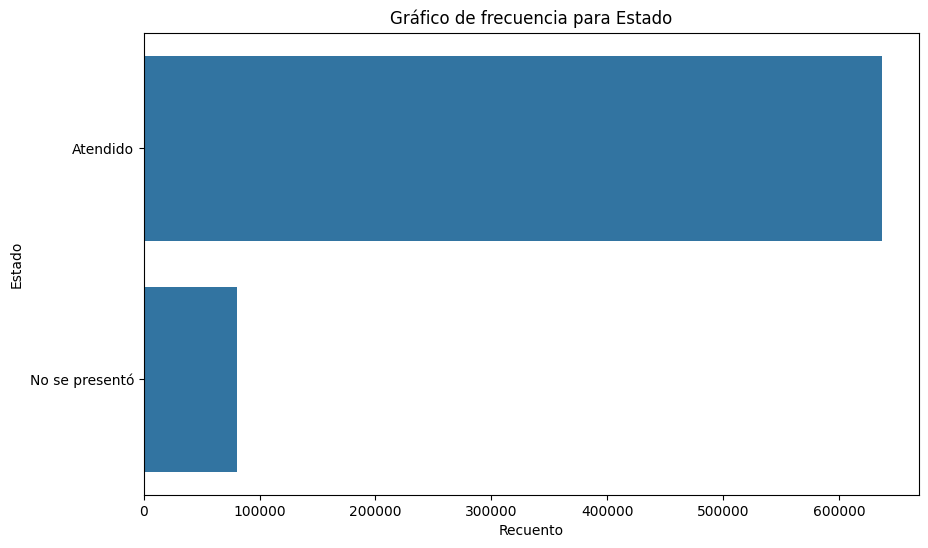


Tabla de Frecuencia para la columna 'Sexo':


,count
Sexo,
Femenino,397090
Masculino,320072


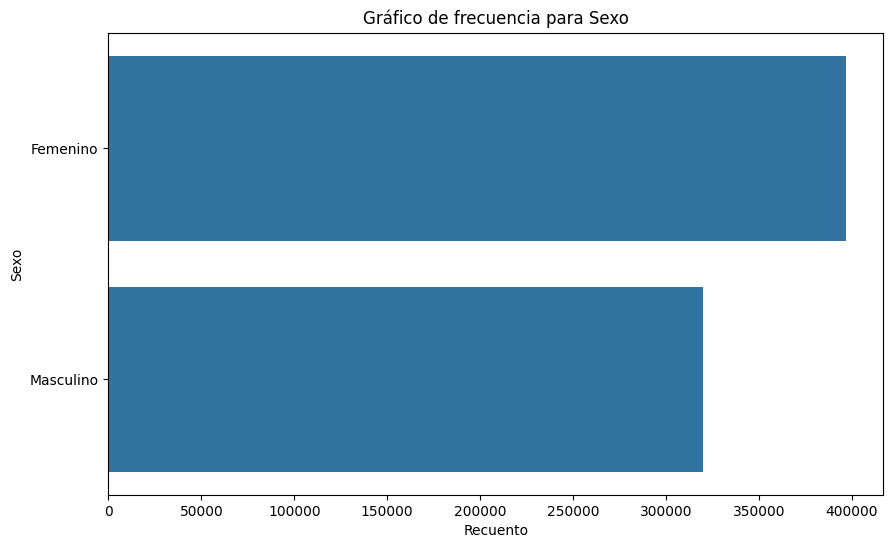


Tabla de Frecuencia para la columna 'Prevision':


,count
Prevision,
FONASA Tipo B,454016
FONASA Tipo D,99998
FONASA Tipo C,86535
FONASA Tipo A,73638
Isapre,1443
Sin Informacion,1414
Otro,118


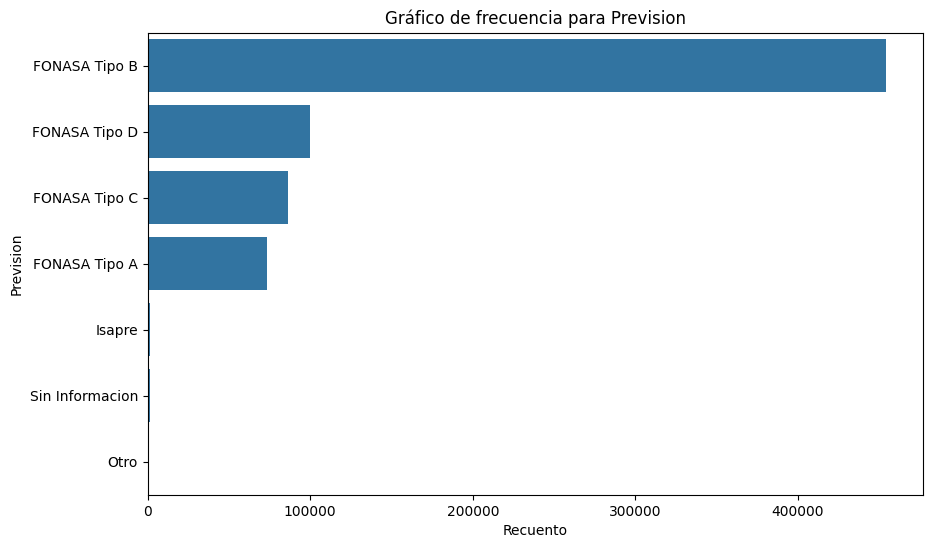


Tabla de Frecuencia para la columna 'Rango Edad':


,count
Rango Edad,
Personas Mayores,309755
Adultos,293480
Adolescencia,50041
Primera Infancia,40629
Niñez,23257


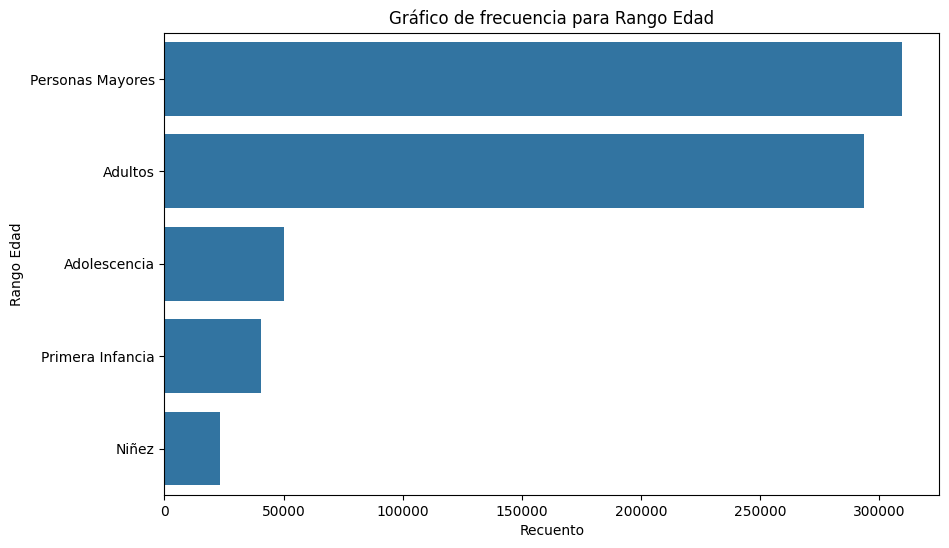


Tabla de Frecuencia para la columna 'Estival Fecha Cita':


,count
Estival Fecha Cita,
Invierno,208169
Primavera,204846
Otoño,189111
Verano,115036


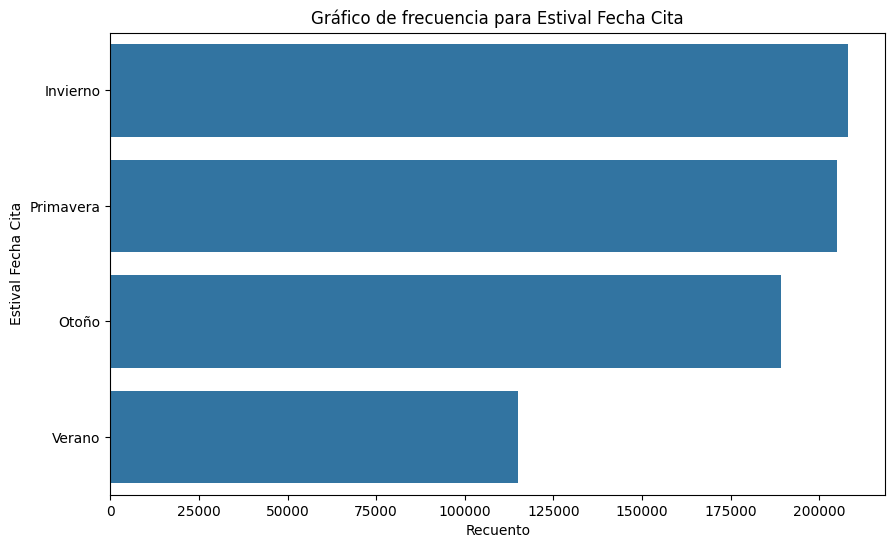


Tabla de Frecuencia para la columna 'Rango Hora Cita':


,count
Rango Hora Cita,
Mañana,239929
Media Mañana,196382
Tarde,164582
Media tarde,109802
Noche,6467


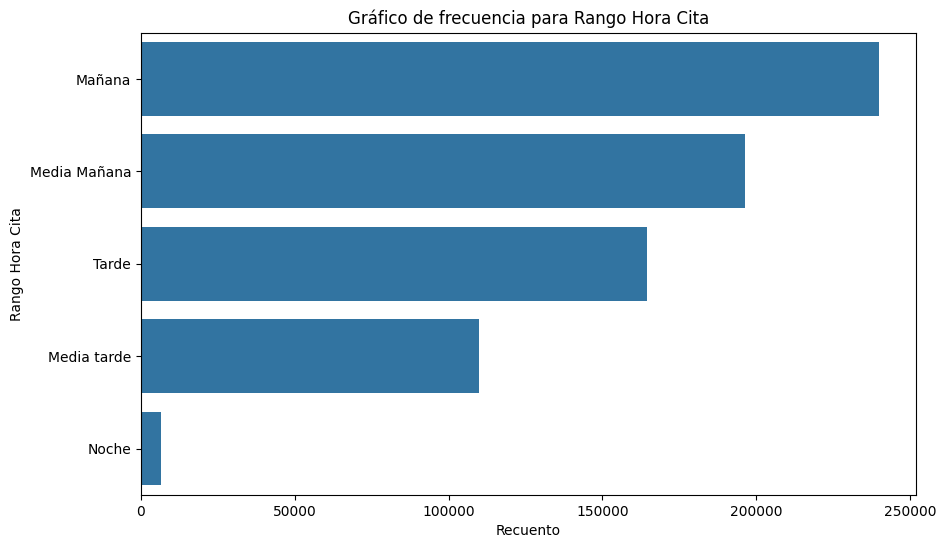


Tabla de Frecuencia para la columna 'Agenda Biomedica':


,count
Agenda Biomedica,
Otros,196023
Medicina Clínica (Adultos),136363
Especialidades Quirúrgicas,104130
Oncología y Enfermedades Complejas,69481
Órganos de los Sentidos,67146
Apoyo Terapéutico y Diagnóstico,60521
Pediatría y Neonatología,45772
Medicina Familiar y Rehabilitación,30397
Salud Mental,7329


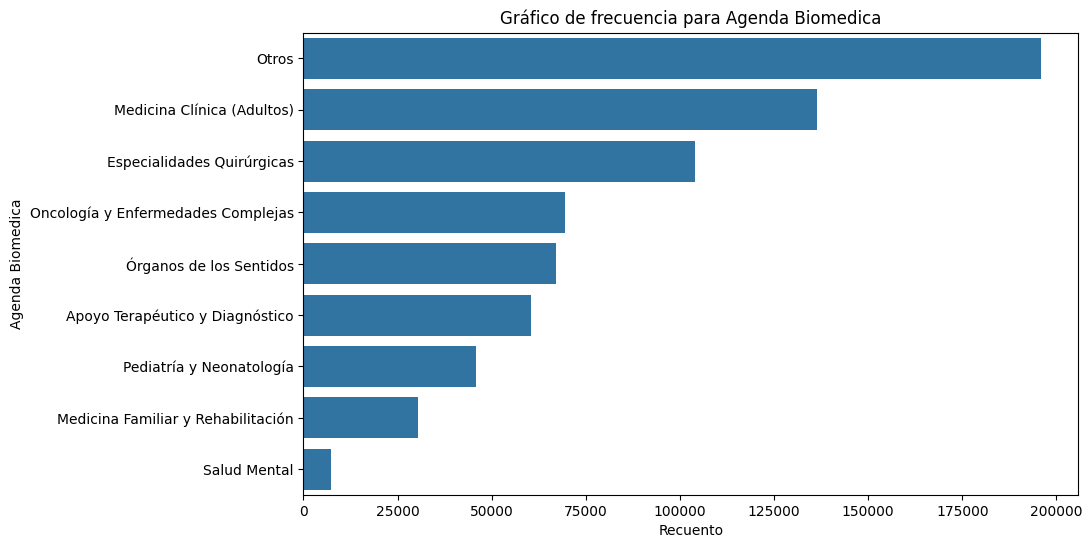


Tabla de Frecuencia para la columna 'Profesional':


,count
Profesional,
Medicina,353622
Enfermeria,164331
Kinesiologia,99339
Odontologia,25483
Fonoaudiologia,19612
Matroneria,19021
Terapia Ocupacional,16906
Psicologia,7851
Nutricion,6034


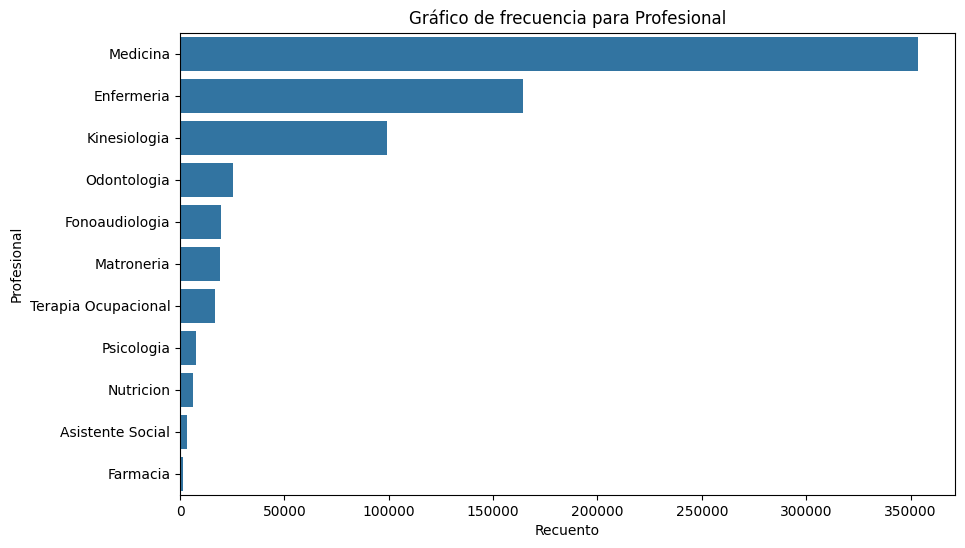


Tabla de Frecuencia para la columna 'Tipo atencion':


,count
Tipo atencion,
Consultas Médicas,301383
Procedimientos y Cirugías,163747
Consultas No Médicas,142668
Gestión Clínica y Administrativa,44721
Otros,40722
Hospitalización y Cuidados Críticos,11890
Atención Domiciliaria,7389
Rehabilitación y Educación en Salud,4642


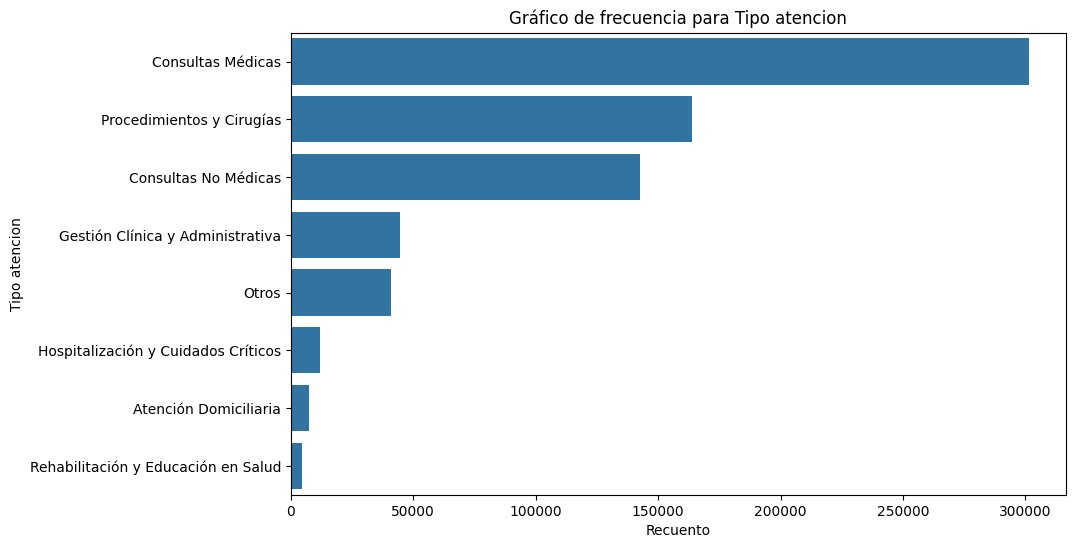


Tabla de Frecuencia para la columna 'Distancia comuna':


,count
Distancia comuna,
Cercana (hasta 40 km),544313
Intermedia (41-80 km),154145
Lejana (+80 km),18704


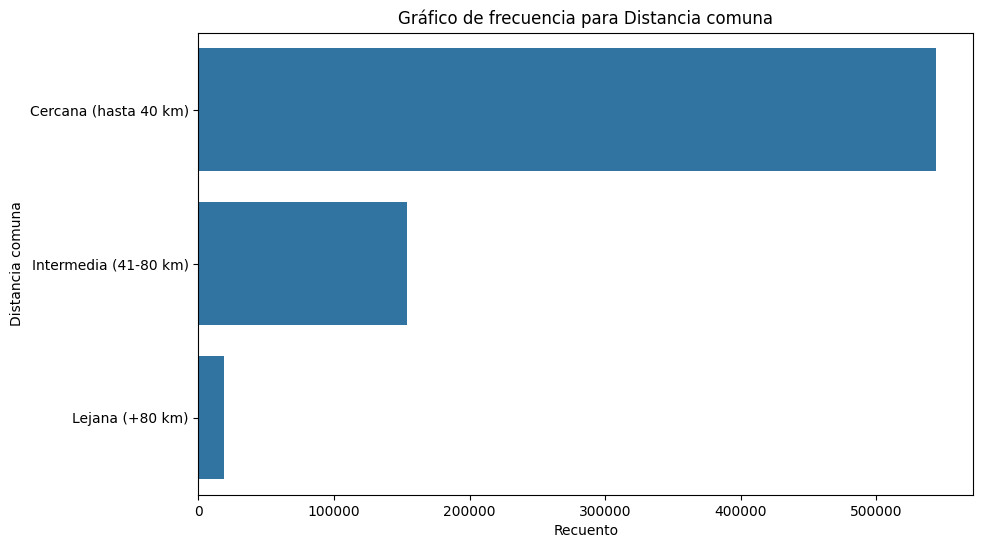


Tabla de Frecuencia para la columna 'Tipo Cita':


,count
Tipo Cita,
Presencial,707776
Telefónica,9386


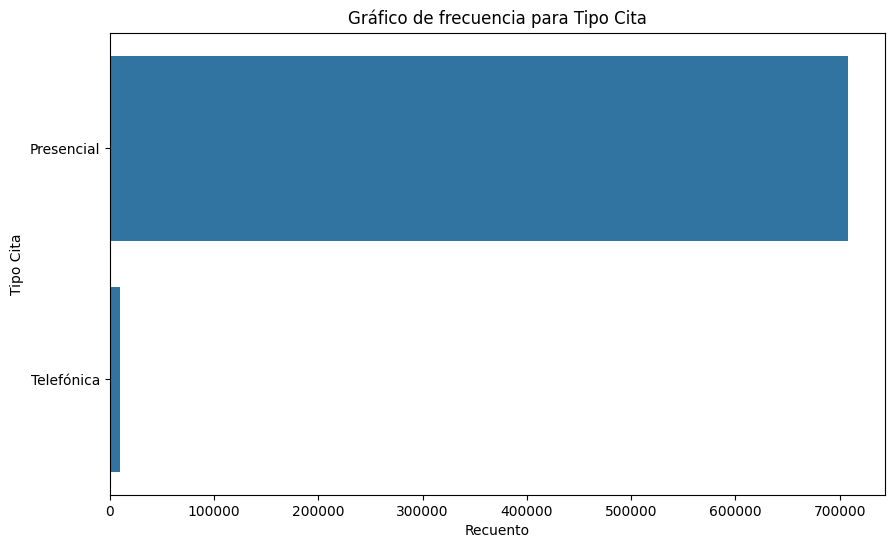

In [7]:
# Generar las tablas para visualizar la frecuencia de cada categoria por variable (columna)
for column in df.select_dtypes(include='object').columns:
    print(f"\nTabla de Frecuencia para la columna '{column}':")
    display(df[column].value_counts().to_frame())

# Generar los gráficos para visualizar la frecuencia de cada categoria por variable (columna)
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Gráfico de frecuencia para {column}')
    plt.xlabel('Recuento')
    plt.ylabel(column)
    plt.show()

In [8]:
#Imputar valores faltantes (Sin información) de la columna Previsión
# Primero, calcular la moda de la columna Previsión (sin considerar las "Sin Informacion") y mostrar la moda
mode_prevision = df[df['Prevision'] != 'Sin Informacion']['Prevision'].mode()[0]
print(f"La moda de la columna 'Prevision' es: '{mode_prevision}'.")

# Segundo, reemplazar todos los "Sin Informacion" con la moda, y mostrar la nueva tabla de frecuencias
df['Prevision'] = df['Prevision'].replace('Sin Informacion', mode_prevision)
print("Nueva tabla de frecuencias de la columna 'Prevision':")
display(df['Prevision'].value_counts().to_frame())

La moda de la columna 'Prevision' es: 'FONASA Tipo B'.
Nueva tabla de frecuencias de la columna 'Prevision':


,count
Prevision,
FONASA Tipo B,455430
FONASA Tipo D,99998
FONASA Tipo C,86535
FONASA Tipo A,73638
Isapre,1443
Otro,118


In [9]:
# Crear las variables X e y para el modelo, "X" tiene todo el set de datos excepto la variable target o etiqueta (Estado), mientras que "y" tiene sólo la variable target o etiqueta
X = df.drop('Estado', axis=1)
y = df['Estado']

In [10]:
# En la variable "y", se asigna el valor 1 para "Atendido" (paciente se presenta a cita) y 0 para "No se presentó" (paciente no se presenta a cita).
# Se puede observar que las clases (distribución de las etiquetas/target) están desbalanceadas
y = y.map({'Atendido': 1, 'No se presentó': 0})
print(y.value_counts())

Estado
1    637104
0     80058
Name: count, dtype: int64


In [11]:
# Separar la data para entrenamiento y validación
from sklearn.model_selection import train_test_split

# 80% entrenamiento y 20% validación para los set X e y creados anteriormente
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [12]:
#Codificar las variables categóricas para su uso en el modelo (mediante one hot encoder)
from sklearn.preprocessing import OneHotEncoder

# Crear variable que incluya las variables categoricas del set X de entrenamiento, y definir parametros de la funcion One hot encoder
categorical_cols = X_train.columns
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# "Aprender" las distintas variables categoricas (todas son categóricas) del set X de entrenamiento
ohe.fit(X_train[categorical_cols])

# Transformar las variables categóricas en variables codificadas en el set X de entrenamiento y validación
X_train_encoded = ohe.transform(X_train[categorical_cols])
X_test_encoded = ohe.transform(X_test[categorical_cols])

# Pasar las variables codificadas a dataframe (tabular)
X_train = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names_out(categorical_cols), index=X_train.index)
X_test = pd.DataFrame(X_test_encoded, columns=ohe.get_feature_names_out(categorical_cols), index=X_test.index)


In [13]:
from imblearn.over_sampling import SMOTE
# Usar SMOTE para balancear los datos
# Definir parametros de SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE a los set de entrenamiento
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Mostrar nueva distribución post-balanceo
print("\nNueva distribución de datos X_train post SMOTE:\n", X_train_resampled.value_counts())
print("\nNueva distribución de datos y_train post SMOTE:\n", y_train_resampled.value_counts())


Nueva distribución de datos X_train post SMOTE:
 Sexo_Femenino  Sexo_Masculino  Prevision_FONASA Tipo A  Prevision_FONASA Tipo B  Prevision_FONASA Tipo C  Prevision_FONASA Tipo D  Prevision_Isapre  Prevision_Otro  Rango Edad_Adolescencia  Rango Edad_Adultos  Rango Edad_Niñez  Rango Edad_Personas Mayores  Rango Edad_Primera Infancia  Estival Fecha Cita_Invierno  Estival Fecha Cita_Otoño  Estival Fecha Cita_Primavera  Estival Fecha Cita_Verano  Rango Hora Cita_Mañana  Rango Hora Cita_Media Mañana  Rango Hora Cita_Media tarde  Rango Hora Cita_Noche  Rango Hora Cita_Tarde  Agenda Biomedica_Apoyo Terapéutico y Diagnóstico  Agenda Biomedica_Especialidades Quirúrgicas  Agenda Biomedica_Medicina Clínica (Adultos)  Agenda Biomedica_Medicina Familiar y Rehabilitación  Agenda Biomedica_Oncología y Enfermedades Complejas  Agenda Biomedica_Otros  Agenda Biomedica_Pediatría y Neonatología  Agenda Biomedica_Salud Mental  Agenda Biomedica_Órganos de los Sentidos  Profesional_Asistente Social  Profesi

**IMPLEMENTACIÓN DE MODELOS DE ML**

In [14]:
# MODELO DE REGRESIÓN LOGÍSTICA (RL)
from sklearn.linear_model import LogisticRegression

# Definir parámetros del modelo de RL
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')

# Entrenar modelo de RL con la data de entrenamiento ya limpia, codificada y balanceada
log_reg_model.fit(X_train_resampled, y_train_resampled)

#Mostrar cuando haya terminado
print("Modelo RL entrenado")

Modelo RL entrenado


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Hacer las predicciones del modelo con el set X de validación
y_pred = log_reg_model.predict(X_test)

# Evaluar el modelo RL con las siguientes métricas y mostrarlas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Evaluación modelo RL:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)




Evaluación modelo RL:
Accuracy: 0.5438
Precision: 0.9456
Recall: 0.5166
F1-Score: 0.6682
Confusion Matrix:
[[12136  3789]
 [61640 65868]]


**Como el Recall del modelo RL es bajo, se entrenará un modelo de Random Forest para luego comparar con el de RL**

In [16]:
# Importar libreria para el modelo de Random Forest (RF)
from sklearn.ensemble import RandomForestClassifier

# Definir parámetros del modelo RF
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo de RF con la data de entrenamiento ya limpia, codificada y balanceada (procesada anteriormente para el modelo RL)
rf_model.fit(X_train_resampled, y_train_resampled)

#Mostrar cuando haya terminado
print("Modelo RF entrenado")

Modelo RF entrenado


In [17]:
# Hacer las predicciones del modelo con el set X de validación
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo RF con las siguientes métricas y mostrarlas
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Evaluación modelo RF")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print("Confusion Matrix:")
print(conf_matrix_rf)



Evaluación modelo RF
Accuracy: 0.6773
Precision: 0.9329
Recall: 0.6864
F1-Score: 0.7909
Confusion Matrix:
[[ 9630  6295]
 [39986 87522]]


In [18]:
# Identificar las variables con mayor importancia

# Aplicar feature_importances_ del modelo rf_model
feature_importances = rf_model.feature_importances_

# Extraer los nombres de las características (columnas) del set X de entrenamiento
feature_names = X_train.columns

# Crear tabla y ordenar por importancia
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las primeras 10 filas de tabla
print("Top 10 Feature Importances from Random Forest:")
print(feature_importance_df.head(10))

Top 10 Feature Importances from Random Forest:
                                             Feature  Importance
32                            Profesional_Enfermeria    0.071780
22  Agenda Biomedica_Apoyo Terapéutico y Diagnóstico    0.044037
45    Tipo atencion_Gestión Clínica y Administrativa    0.038324
27                            Agenda Biomedica_Otros    0.032112
43                   Tipo atencion_Consultas Médicas    0.031243
3                            Prevision_FONASA Tipo B    0.030351
15                      Estival Fecha Cita_Primavera    0.028579
11                       Rango Edad_Personas Mayores    0.028411
13                       Estival Fecha Cita_Invierno    0.028343
37                              Profesional_Medicina    0.027855


**Si bien el Recall del modelo RF es mejor que el de RL, se entrenará un modelo de XGBoost para luego comparar con el de RL**

In [19]:
from xgboost import XGBClassifier

# Definir parametros de modelo XGBoost
xgb_model = XGBClassifier(random_state=42)

# Entrenar el modelo de XGBoost con la data de entrenamiento ya limpia, codificada y balanceada (procesada anteriormente para el modelo RL)
xgb_model.fit(X_train_resampled, y_train_resampled)

print("Modelo XGBoost entrenado")

Modelo XGBoost entrenado


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Hacer las predicciones del modelo con el set X de validación
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo RF con las siguientes métricas y mostrarlas
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print("Evaluacion modelo XGBoost:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print("Confusion Matrix:")
print(conf_matrix_xgb)



Evaluacion modelo XGBoost:
Accuracy: 0.6603
Precision: 0.9360
Recall: 0.6632
F1-Score: 0.7763
Confusion Matrix:
[[10142  5783]
 [42941 84567]]


**El Recall del modelo XGBoost es muy similar al del RF. Se realizara un target encoding para reducir la cardinalidad de las variables y se entrenará nuevamente un modelo de RF**

In [21]:
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder

# Separar la data original en 80/20 antes del one hot encoding y extraer las columnas
X_train_te, X_test_te, y_train_te, y_test_te = train_test_split(
    X, y, test_size=0.2, random_state=42
)

categorical_cols = X_train_te.columns

# Definir parametros para TargetEncoder
te = TargetEncoder(cols=list(categorical_cols))

# "Aprender" desde el set X e y de entrenamiento
te.fit(X_train_te, y_train_te)

# Transformar las variables categóricas en variables target encoded en el set X de entrenamiento y validación
X_train_te_encoded = te.transform(X_train_te)
X_test_te_encoded = te.transform(X_test_te)

# Aplicar SMOTE a los set de entrenamiento para balancear
smote_te = SMOTE(random_state=42)
X_train_te_resampled, y_train_te_resampled = smote_te.fit_resample(X_train_te_encoded, y_train_te)

# Entrenar modelo de RF con target encoding
rf_model_te = RandomForestClassifier(random_state=42)
rf_model_te.fit(X_train_te_resampled, y_train_te_resampled)

# Mostrar cuando termina
print("\nModelo RF con target encoding entrenado")

# Hacer las predicciones con el modelo
y_pred_rf_te = rf_model_te.predict(X_test_te_encoded)

# Calcular metricas de evaluacion y mostrarlas
accuracy_rf_te = accuracy_score(y_test_te, y_pred_rf_te)
precision_rf_te = precision_score(y_test_te, y_pred_rf_te)
recall_rf_te = recall_score(y_test_te, y_pred_rf_te)
f1_rf_te = f1_score(y_test_te, y_pred_rf_te)
conf_matrix_rf_te = confusion_matrix(y_test_te, y_pred_rf_te)

print("Evaluación modelo RF con Target Encoding:")
print(f"Accuracy: {accuracy_rf_te:.4f}")
print(f"Precision: {precision_rf_te:.4f}")
print(f"Recall: {recall_rf_te:.4f}")
print(f"F1-Score: {f1_rf_te:.4f}")
print("Confusion Matrix:")
print(conf_matrix_rf_te)


Modelo RF con target encoding entrenado
Evaluación modelo RF con Target Encoding:
Accuracy: 0.6771
Precision: 0.9329
Recall: 0.6862
F1-Score: 0.7907
Confusion Matrix:
[[ 9627  6298]
 [40013 87495]]


**DISTINTOS HIPERPARAMETROS PARA RL Y RF**

In [22]:
#Ajuste de hiperparámetros para RL (C=0.1)

# Definir parámetros modelo
log_reg_model_tuned_C01 = LogisticRegression(solver='liblinear', C=0.1, random_state=42)

# Entrenar modelo
log_reg_model_tuned_C01.fit(X_train_resampled, y_train_resampled)

print("Modelo RL con C=0.1 entrenado")

# Hacer las predicciones
y_pred_tuned_C01 = log_reg_model_tuned_C01.predict(X_test)

# Evaluación de métricas
accuracy_tuned_C01 = accuracy_score(y_test, y_pred_tuned_C01)
precision_tuned_C01 = precision_score(y_test, y_pred_tuned_C01)
recall_tuned_C01 = recall_score(y_test, y_pred_tuned_C01)
f1_tuned_C01 = f1_score(y_test, y_pred_tuned_C01)
conf_matrix_tuned_C01 = confusion_matrix(y_test, y_pred_tuned_C01)

print("Evaluación modelo RL con C=0.1:")
print(f"Accuracy: {accuracy_tuned_C01:.4f}")
print(f"Precision: {precision_tuned_C01:.4f}")
print(f"Recall: {recall_tuned_C01:.4f}")
print(f"F1-Score: {f1_tuned_C01:.4f}")
print("Confusion Matrix:")
print(conf_matrix_tuned_C01)

Modelo RL con C=0.1 entrenado
Evaluación modelo RL con C=0.1:
Accuracy: 0.5439
Precision: 0.9455
Recall: 0.5167
F1-Score: 0.6682
Confusion Matrix:
[[12131  3794]
 [61628 65880]]


In [23]:
#Ajuste de hiperparámetros para RL (C=10)

# Definir parámetros modelo
log_reg_model_tuned_C10 = LogisticRegression(solver='liblinear', C=10, random_state=42)

# Entrenar modelo
log_reg_model_tuned_C10.fit(X_train_resampled, y_train_resampled)

print("Modelo RL con C=10 entrenado")

# Hacer las predicciones
y_pred_tuned_C10 = log_reg_model_tuned_C10.predict(X_test)

# Evaluación de métricas
accuracy_tuned_C10 = accuracy_score(y_test, y_pred_tuned_C10)
precision_tuned_C10 = precision_score(y_test, y_pred_tuned_C10)
recall_tuned_C10 = recall_score(y_test, y_pred_tuned_C10)
f1_tuned_C10 = f1_score(y_test, y_pred_tuned_C10)
conf_matrix_tuned_C10 = confusion_matrix(y_test, y_pred_tuned_C10)

print("Evaluación modelo RL con C=10:")
print(f"Accuracy: {accuracy_tuned_C10:.4f}")
print(f"Precision: {precision_tuned_C10:.4f}")
print(f"Recall: {recall_tuned_C10:.4f}")
print(f"F1-Score: {f1_tuned_C10:.4f}")
print("Confusion Matrix:")
print(conf_matrix_tuned_C10)

Modelo RL con C=10 entrenado
Evaluación modelo RL con C=10:
Accuracy: 0.5439
Precision: 0.9456
Recall: 0.5167
F1-Score: 0.6682
Confusion Matrix:
[[12136  3789]
 [61630 65878]]


In [24]:
#Ajuste de hiperparámetros para RF con n_estimators=200, max_depth=20, min_samples_split=5

# Definir parámetros del modelo
rf_model_tuned = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, random_state=42)

# Entrenar modelo
rf_model_tuned.fit(X_train_resampled, y_train_resampled)

print("Modelo RF con hiperparámetros ajustados entrenado")

# Hacer predicciones
y_pred_rf_tuned = rf_model_tuned.predict(X_test)

# Evaluación de métricas
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
precision_rf_tuned = precision_score(y_test, y_pred_rf_tuned)
recall_rf_tuned = recall_score(y_test, y_pred_rf_tuned)
f1_rf_tuned = f1_score(y_test, y_pred_rf_tuned)
conf_matrix_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)

print("Evaluación modelo RF con hiperparámetros ajustados:")
print(f"Accuracy: {accuracy_rf_tuned:.4f}")
print(f"Precision: {precision_rf_tuned:.4f}")
print(f"Recall: {recall_rf_tuned:.4f}")
print(f"F1-Score: {f1_rf_tuned:.4f}")
print("Confusion Matrix:")
print(conf_matrix_rf_tuned)

Modelo RF con hiperparámetros ajustados entrenado
Evaluación modelo RF con hiperparámetros ajustados:
Accuracy: 0.6362
Precision: 0.9449
Recall: 0.6273
F1-Score: 0.7540
Confusion Matrix:
[[11256  4669]
 [47516 79992]]
